In [2]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
tf.keras.backend.set_floatx('float64')

# Data Preparation
X_train = np.load('data_mnist/X_train.npy', allow_pickle=True)
y_train = np.load('data_mnist/y_train.npy', allow_pickle=True)
X_test = np.load('data_mnist/X_test.npy', allow_pickle=True)
y_test = np.load('data_mnist/y_test.npy', allow_pickle=True)

X_train = X_train/255
X_test  = X_test/255

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

print(y_train[:5])

(60000, 784)
(60000,)
(10000, 784)
(10000,)
[5 0 4 1 9]


In [3]:
# predict    
def predict(x, W, b):
    return tf.math.softmax(tf.matmul(x, W) + b)

    
### weights
W = tf.Variable(tf.random.normal((784, 10), mean=0, stddev=0.1, dtype=tf.float64))
b = tf.Variable(tf.zeros((10,), dtype=tf.float64))

### training
learning_rate = 0.1
num_epochs = 300

### loss function
loss = tf.keras.losses.SparseCategoricalCrossentropy()

losses = [] # for debug
for epoch in range(num_epochs):
    with tf.GradientTape() as t:
        # output
        output = predict(X_train, W, b)
        
        # loss
        loss_v = loss(y_train, output)
        losses.append(loss_v.numpy())
        
        # gradient
        dW, db = t.gradient(loss_v, [W, b])
        
        # update
        W.assign_sub(learning_rate * dW) 
        b.assign_sub(learning_rate * db)

Text(0, 0.5, 'Loss')

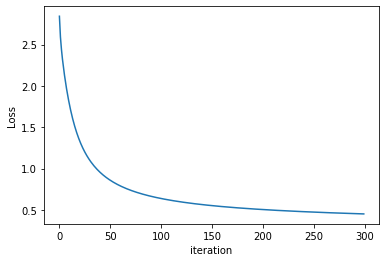

In [5]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Loss')

In [6]:
preds = predict(X_test, W, b)

preds = preds.numpy()
predicted_class = np.argmax(preds, axis=1)

acc = np.mean(predicted_class == y_test)
print(acc.mean())

0.8867


In [8]:
# predict    
def predict(x, W, b):
    return tf.math.softmax(tf.matmul(x, W) + b)

    
### weights
W = tf.Variable(tf.random.normal((784, 10), mean=0, stddev=0.01, dtype=tf.float64))
b = tf.Variable(tf.zeros((10,), dtype=tf.float64))

### training
learning_rate = 0.1
num_epochs = 300

### loss function
loss = tf.keras.losses.SparseCategoricalCrossentropy()

losses = [] # for debug
for epoch in range(num_epochs):
    with tf.GradientTape() as t:
        # output
        output = predict(X_train, W, b)
        
        # loss
        loss_v = loss(y_train, output)
        losses.append(loss_v.numpy())
        
        # gradient
        dW, db = t.gradient(loss_v, [W, b])
        
        # update
        W.assign_sub(learning_rate * dW) 
        b.assign_sub(learning_rate * db)

Text(0, 0.5, 'Loss')

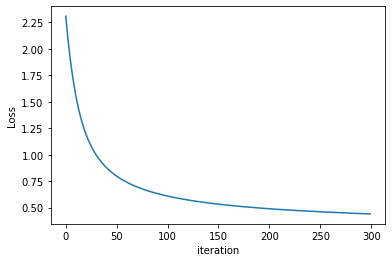

In [9]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Loss')

In [10]:
preds = predict(X_test, W, b)

preds = preds.numpy()
predicted_class = np.argmax(preds, axis=1)

acc = np.mean(predicted_class == y_test)
print(acc.mean())

0.8934


In [7]:
# without normalization

import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
tf.keras.backend.set_floatx('float64')

# Data Preparation
X_train = np.load('data_mnist/X_train.npy', allow_pickle=True)
y_train = np.load('data_mnist/y_train.npy', allow_pickle=True)
X_test = np.load('data_mnist/X_test.npy', allow_pickle=True)
y_test = np.load('data_mnist/y_test.npy', allow_pickle=True)

X_train = X_train.astype(np.float64)
X_test  = X_test.astype(np.float64)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [8]:
# predict    
def predict(x, W, b):
    return tf.math.softmax(tf.matmul(x, W) + b)

    
### weights
W = tf.Variable(tf.random.normal((784, 10), mean=0, stddev=0.1, dtype=tf.float64))
b = tf.Variable(tf.zeros((10,), dtype=tf.float64))

### training
learning_rate = 0.1
num_epochs = 200

### loss function
loss = tf.keras.losses.SparseCategoricalCrossentropy()

losses = [] # for debug
for epoch in range(num_epochs):
    with tf.GradientTape() as t:
        # output
        output = predict(X_train, W, b)
        
        # loss
        loss_v = loss(y_train, output)
        losses.append(loss_v.numpy())
        
        # gradient
        dW, db = t.gradient(loss_v, [W, b])
        
        # update
        W.assign_sub(learning_rate * dW) 
        b.assign_sub(learning_rate * db)

Text(0, 0.5, 'Loss')

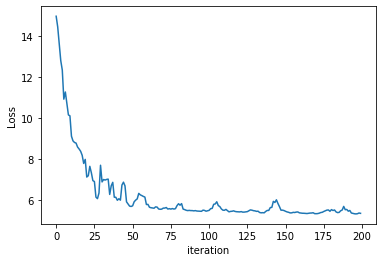

In [9]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Loss')

In [10]:
preds = predict(X_test, W, b)

preds = preds.numpy()
predicted_class = np.argmax(preds, axis=1)

acc = np.mean(predicted_class == y_test)
print(acc.mean())

0.6621
